In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
df=pd.read_csv(r"C:\Users\prade\Projects ML\Israel_palestine_SA\pse_isr_reddit_comments.csv\pse_isr_reddit_comments.csv")

In [4]:
df.sample(5)

,comment_id,score,self_text,subreddit,created_time
364253,k4d0e7j,70,&gt;As someone who supports Palestinian self-d...,NonCredibleDefense,2023-10-11 01:47:56+00:00
178735,k5k7jr5,4,UFC fans and little to no reading comprehensio...,CrazyFuckingVideos,2023-10-19 16:00:19+00:00
416615,k3zf3xr,6,"There is no circumstance where ""kill all Jews""...",IsraelPalestine,2023-10-08 13:08:09+00:00
34563,k6r01b6,2,Channel 4 news is one outlet that's basically ...,IsraelPalestine,2023-10-27 23:17:57+00:00
409825,k4190mh,321,Well the kid gloves are really off. Looks like...,CombatFootage,2023-10-08 19:58:05+00:00


In [5]:
df.info

<bound method DataFrame.info of        comment_id  score                                          self_text  \
0         k70vrzb      1  Lol what kind of busted translator device you ...   
1         k70vk4r      1  Translation:\n\nAmen. Kill jews and continue g...   
2         k70vhew      1  Friendly fact reminder: Israel has been steali...   
3         k70ve4h      1  Well, i would never support Hamas, but there a...   
4         k70vay1      1  /u/TickeMeTendie. This is an automatic notice:...   
...           ...    ...                                                ...   
436720    k3sdwfc     42                               US. This is bullshit   
436721    k3sdixt      1  I am in the United States and it has the dotte...   
436722    k3sccp2     54  In which country are you?\nSometimes maps adap...   
436723    k3ritvj    116  You can't give up on something you only preten...   
436724    k3riboh     30  &gt; The head of Islamic Jihad denounced Arab ...   

              subre

In [6]:
for i in range(10):
    print(df.self_text[i])

Lol what kind of busted translator device you got. Does it speak only hasbara?
Translation:

Amen. Kill jews and continue gazan oppression!
Friendly fact reminder: Israel has been stealing Palestines land, bombing their civilians, controlling their access to water/food and kidnapping Palestinian civilians for over 50 years. Israel has  been committing genocide on Palestine but somehow people like you like to place the blame on Palestine. If you think Hamas is bad, I have some bad news about the IDF for you.
Well, i would never support Hamas, but there actions Israel could do that would make me stop supporting it: State orginized killing of Israeli or west bank Arabs or use of Atomic weaponary.
/u/TickeMeTendie. This is an automatic notice: 
'Nazis' Casual comments and analogies are inflammatory and therefor not allowed.  
We allow for exemptions for comments with meaningful information that must be based on historical facts accepted by mainstream historians. See [Rule 6](https://www.re

In [7]:
import zipfile
import os

zip_file_path = 'C:\\Users\\prade\\AppData\\Roaming\\nltk_data\\corpora\\wordnet.zip'
destination_directory = 'C:\\Users\\prade\\AppData\\Roaming\\nltk_data\\corpora'

# Check if the specific file exists in the destination directory
file_to_check = 'index.adv'
file_path_to_check = os.path.join(destination_directory, 'wordnet', file_to_check)

if not os.path.exists(file_path_to_check):
    # Unzip the entire archive if the specific file doesn't exist
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_directory)
    print(f"Successfully unzipped {zip_file_path} to {destination_directory}")
else:
    print(f"File {file_to_check} already exists. No need to unzip the archive.")

File index.adv already exists. No need to unzip the archive.


In [8]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))

def clean_text(text):
    text=re.sub(r'http\S+', '',text)

    soup=BeautifulSoup(text, 'html.parser')
    text=soup.get_text()

    text=re.sub(r'[^a-zA-Z0-9\s]', '',text).lower()

    tokens=word_tokenize(text)

    tokens=[lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    cleaned_text=' '.join(tokens)

    return cleaned_text

df['clean_text']=df['self_text'].apply(clean_text)



c:\Users\prade\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [9]:
for i in range(10):
    print(df.clean_text[i])

lol kind busted translator device got speak hasbara
translation amen kill jew continue gazan oppression
friendly fact reminder israel stealing palestine land bombing civilian controlling access waterfood kidnapping palestinian civilian 50 year israel committing genocide palestine somehow people like like place blame palestine think hamas bad bad news idf
well would never support hamas action israel could would make stop supporting state orginized killing israeli west bank arab use atomic weaponary
utickemetendie automatic notice nazi casual comment analogy inflammatory therefor allowed allow exemption comment meaningful information must based historical fact accepted mainstream historian see rule 6 detail bot flag comment using simple word detection distinguish acceptable unacceptable usage please take moment review comment confirm compliance bot action performed automatically please contact moderator subredditmessagecomposetorisraelpalestine question concern
absolutely evidence hamas 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436725 entries, 0 to 436724
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    436725 non-null  object
 1   score         436725 non-null  int64 
 2   self_text     436725 non-null  object
 3   subreddit     436725 non-null  object
 4   created_time  436725 non-null  object
 5   clean_text    436725 non-null  object
dtypes: int64(1), object(5)
memory usage: 20.0+ MB


SENTIMENT ANALYSIS USING VADER

In [11]:

analyzer=SentimentIntensityAnalyzer()

scores={
    "Compound":[],
    "Positive":[],
    "Negative":[],
    "Neutral":[]
}

#generating sentiment scores for reddit Comments

for comment in df['clean_text']:
    compound=analyzer.polarity_scores(comment)["compound"]
    pos=analyzer.polarity_scores(comment)["pos"]
    neu=analyzer.polarity_scores(comment)["neu"]
    neg=analyzer.polarity_scores(comment)["neg"]

    scores["Compound"].append(compound)
    scores["Positive"].append(pos)
    scores["Negative"].append(neg)
    scores["Neutral"].append(neu)

#creating new Dataframe for sentiment scores
sentiment_score=pd.DataFrame(scores)

#joining scores dataframe with original dataframe

df=pd.concat([df,sentiment_score],axis=1)

In [12]:
df.head()

,comment_id,score,self_text,subreddit,created_time,clean_text,Compound,Positive,Negative,Neutral
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,lol kind busted translator device got speak ha...,0.7351,0.508,0.000,0.492
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,translation amen kill jew continue gazan oppre...,-0.6908,0.000,0.439,0.561
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,friendly fact reminder israel stealing palesti...,-0.6808,0.195,0.270,0.535
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,well would never support hamas action israel c...,-0.5938,0.162,0.287,0.551
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,utickemetendie automatic notice nazi casual co...,0.8402,0.238,0.048,0.714


In [13]:
#defining conditions for sentiment categories based on 'compound' scores

#if comp score <=-0.5 classify as "negative"
#if comp score >-0.5 and <0.5 classify as "neutral"
#if comp score >=0.5 classify as "positive"

conditons=[
    (df['Compound']<= -0.5),
    (df['Compound']> -0.5) & (df['Compound']< 0.5),
    (df['Compound']> 0.5)
]

#defining corresponding values for eaach condition

values=['Negative','Neutral','Positive']

#creating new column 'Category' to assign values based on conditions
df['Category']=np.select(conditons,values)

In [14]:
df.head()

,comment_id,score,self_text,subreddit,created_time,clean_text,Compound,Positive,Negative,Neutral,Category
0,k70vrzb,1,Lol what kind of busted translator device you ...,IsraelPalestine,2023-10-29 23:59:03+00:00,lol kind busted translator device got speak ha...,0.7351,0.508,0.000,0.492,Positive
1,k70vk4r,1,Translation:\n\nAmen. Kill jews and continue g...,IsraelPalestine,2023-10-29 23:57:29+00:00,translation amen kill jew continue gazan oppre...,-0.6908,0.000,0.439,0.561,Negative
2,k70vhew,1,Friendly fact reminder: Israel has been steali...,IsraelPalestine,2023-10-29 23:56:58+00:00,friendly fact reminder israel stealing palesti...,-0.6808,0.195,0.270,0.535,Negative
3,k70ve4h,1,"Well, i would never support Hamas, but there a...",IsraelPalestine,2023-10-29 23:56:18+00:00,well would never support hamas action israel c...,-0.5938,0.162,0.287,0.551,Negative
4,k70vay1,1,/u/TickeMeTendie. This is an automatic notice:...,IsraelPalestine,2023-10-29 23:55:42+00:00,utickemetendie automatic notice nazi casual co...,0.8402,0.238,0.048,0.714,Positive


EXPLORATORY DATA ANALYSIS

In [15]:
#grouping dataframe by catgory and counting occurences of each category

category_counts=df.groupby(['Category'])['Category'].count()

#creating dataframe with counts and renaming column to 'counts'ArithmeticError
counts_df=pd.DataFrame(category_counts).rename(columns={"Category":"Counts"})

#calculating percentag for each category and add it as a new column 'percentage'
counts_df['Percentage']=(counts_df['Counts']/counts_df['Counts'].sum())*100

counts_df=counts_df.drop(index='0')

#returning summary Dataframe
print(counts_df)

          Counts  Percentage
Category                    
Negative  123092   28.185242
Neutral   247471   56.665178
Positive   66146   15.145916


In [16]:
counts_df

,Counts,Percentage
Category,,
Negative,123092,28.185242
Neutral,247471,56.665178
Positive,66146,15.145916


PIE CHART OF SENTIMENT COUNTS

In [17]:
import plotly.express as px

#creating piechart using plotly
fig=px.pie(counts_df,values='Counts',names=counts_df.index,
           labels={'Category':'Sentiment Category','Counts':'Count'},
           title='Distribution of Sentiment Categories in Comments',
           hole=0.3,color_discrete_sequence=px.colors.qualitative.Set1)

#setting bg of chart
fig.update_layout(paper_bgcolor='darkgrey')

fig.show()


<img src="pie.png" alt="Distribution of Sentiment Categories in Comments">


POSITIVE OR NEGATIVE BIAS DETECTION

In [18]:
subreddit_sentiment=df.groupby('subreddit')[['Positive','Negative']].mean()
#calculating difference between positive and negative sentiment scores
subreddit_sentiment['Bias']=subreddit_sentiment['Positive']-subreddit_sentiment['Negative']

#determining direction of bias:positive,negative or neutral
def determine_bias(bias):
    if bias>0.01:
        return 'Positive'
    elif bias< -0.01:
        return 'Negative'
    else:
        return 'Neutral'

subreddit_sentiment['Bias Direction']=subreddit_sentiment['Bias'].apply(determine_bias)

most_biased_subreddits=subreddit_sentiment.sort_values(by='Bias',ascending=False)
print(most_biased_subreddits)

                       Positive  Negative      Bias Bias Direction
subreddit                                                         
AbruptChaos            0.170791  0.132264  0.038527       Positive
NonCredibleDefense     0.155961  0.147808  0.008152        Neutral
CrazyFuckingVideos     0.162982  0.168266 -0.005284        Neutral
Palestine              0.176340  0.186609 -0.010269       Negative
AskMiddleEast          0.166732  0.182092 -0.015360       Negative
IsraelPalestine        0.166904  0.186300 -0.019397       Negative
CombatFootage          0.157813  0.182511 -0.024698       Negative
worldnews              0.160626  0.186105 -0.025479       Negative
ActualPublicFreakouts  0.177926  0.206657 -0.028731       Negative
worldnewsvideo         0.172257  0.205349 -0.033092       Negative
TerrifyingAsFuck       0.167938  0.203776 -0.035839       Negative
PublicFreakout         0.160095  0.202689 -0.042594       Negative
IsrealPalestineWar_23  0.171626  0.220825 -0.049199       Nega

TOPIC MODELLING

In [19]:
vectorizer=TfidfVectorizer(max_features=5000,stop_words='english')
tfidf_matrix=vectorizer.fit_transform(df['clean_text'])
lda_model=LatentDirichletAllocation(n_components=5,random_state=42,n_jobs=-1)
#assuming 5 topics
lda_topic_matrix=lda_model.fit_transform(tfidf_matrix)


In [20]:
#getting feature names from vectorizer
feature_names=vectorizer.get_feature_names_out()

#getting top words for each topic
n_top_words=15
top_wordsper_topic=[]
for topic_idx,topic in enumerate(lda_model.components_):
    topic_words_idx=topic.argsort()[:-n_top_words-1:-1]
    top_words=[feature_names[i] for i in topic_words_idx]
    top_wordsper_topic.append(top_words)

#displaying topics and associated top words
for topic_idx,top_words in enumerate(top_wordsper_topic):
    print(f"Topic #{topic_idx+1}: ")
    print(", ".join(top_words))
    print("\n")
    

Topic #1: 
hamas, palestinian, israel, people, israeli, terrorist, civilian, child, dont, palestine, support, right, genocide, war, like


Topic #2: 
israel, land, arab, year, country, like, war, yes, time, palestinian, jew, iran, people, state, palestine


Topic #3: 
israel, hamas, gaza, civilian, war, rocket, egypt, people, dont, palestinian, water, bomb, want, military, like


Topic #4: 
jew, dont, people, muslim, comment, im, know, israel, like, think, thank, religion, say, youre, jewish


Topic #5: 
video, source, like, lol, news, hospital, post, hamas, thats, look, im, evidence, know, propaganda, people




In [21]:
#getting vocbulary indices for 'israel' and 'palestine' in vectorizer

israel_word_index=vectorizer.vocabulary_['israel']
palestine_word_index=vectorizer.vocabulary_['palestine']

topic_term_distribution=lda_model.components_

israel_topic_index=topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index=topic_term_distribution[:, palestine_word_index].argmax()

GEOPOLITICAL STANCE DETERMINATION USING DOMINNT TOPICS AND SENTIMENT SCORES.

In [24]:
#function to determine geopolitical stance
def determine_geopolitical_stance(row):
    sentiment_score=row['Compound']
    topic_distribution=lda_model.transform(vectorizer.transform([row['clean_text']]))[0]

    #determining stance based on sentiment score and dominant topic
    if sentiment_score<= -0.5:
        return "Against Israel/Palestine"
    elif sentiment_score >= 0.5 and topic_distribution.argmax()==israel_topic_index:
        return "Supports Israel"
    elif sentiment_score >= 0.5 and topic_distribution.argmax()==palestine_topic_index:
        return "Supports Palestine"
    else:
        return "Neutral/Stance not Clear"
    
#applying function to dataframe to understand geopolitical stance

df['geopolitical_stance']=df.apply(determine_geopolitical_stance,axis=1)

In [25]:
stance_counts=df['geopolitical_stance'].value_counts()
print("Geopolitical Stance Distribution: ")
print(stance_counts)

Geopolitical Stance Distribution: 
Neutral/Stance not Clear    285629
Against Israel/Palestine    123092
Supports Palestine           15117
Supports Israel              12887
Name: geopolitical_stance, dtype: int64


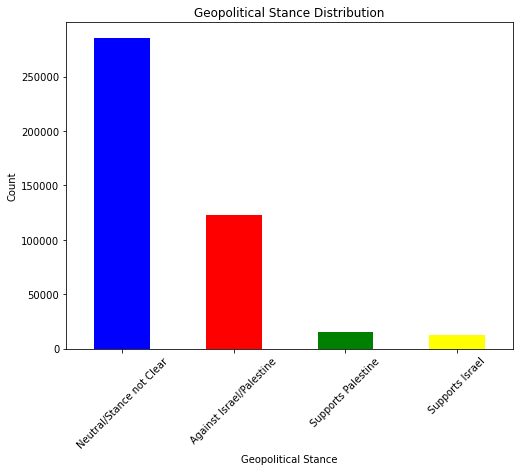

In [26]:
stance_counts=df['geopolitical_stance'].value_counts()

#creating bar chart using dataframe values
plt.figure(figsize=(8,6))
stance_counts.plot(kind='bar',color=['blue','red','green','yellow'])
plt.xlabel('Geopolitical Stance')
plt.ylabel('Count')
plt.title('Geopolitical Stance Distribution')
plt.xticks(rotation=45)
plt.show()

The distribution of geopolitical stances on the Israel-Palestine issue within the dataset is as follows:

Neutral/Stance Not Clear: This category comprises the majority with 286,000 instances, indicating that a significant portion of the data does not express a clear position on the Israel-Palestine issue.

Against Israel/Palestine: There are 123,092 instances where the stance opposes Israel, Palestine, or both. This reflects a substantial segment of the dataset expressing negative sentiment or opposition towards the parties involved.

Supports Palestine: There are 13,911 instances where the stance supports Palestine. While fewer in number compared to neutrality and opposition, this segment represents a notable portion of the dataset that favors the Palestinian side.

Supports Israel: There are 13,722 instances where the stance supports Israel. Similar to supporting Palestine, this segment is smaller but significant within the dataset, indicating support for the Israeli side.

INFERENCE:

Neutral/Stance Not Clear: The largest group, indicating that most of the dataset does not take a definitive stance on the Israel-Palestine issue.


Against Israel/Palestine: A substantial number of instances express opposition or negative sentiment towards Israel, Palestine, or both.


Supports Palestine: Represents a smaller but notable segment supporting the Palestinian side.


Supports Israel: Also a smaller but significant segment expressing support for the Israeli side.


This breakdown underscores the diversity of opinions within the dataset regarding the Israel-Palestine conflict, with a significant portion not clearly stating a stance, and a slightly higher number leaning towards opposition compared to support for either side.